# ex4_main file

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("/content/drive/My Drive/C&C/ex4/python_files")
from utils import loadMNISTLabels, loadMNISTImages
from ff import FF

In [0]:
## Loading the dataset
y_test = loadMNISTLabels('/content/drive/My Drive/C&C/ex4/MNIST_data/t10k-labels-idx1-ubyte')
y_train = loadMNISTLabels('/content/drive/My Drive/C&C/ex4/MNIST_data/train-labels-idx1-ubyte')

X_test = loadMNISTImages('/content/drive/My Drive/C&C/ex4/MNIST_data/t10k-images-idx3-ubyte')
X_train = loadMNISTImages('/content/drive/My Drive/C&C/ex4/MNIST_data/train-images-idx3-ubyte')

In [0]:
## Parameters
layers_sizes = [784,30,10] # flexible, but should be [784,...,10]
epochs = 10
eta = 0.1
batch_size = 20

In [178]:
## Training
net = FF(layers_sizes)
steps, test_acc = net.sgd(X_train, y_train, epochs, eta, batch_size, X_test, y_test)

Starting training, test accuracy: 0.1532
Done epoch 1, test accuracy: 0.8988
Done epoch 2, test accuracy: 0.9125
Done epoch 3, test accuracy: 0.9154
Done epoch 4, test accuracy: 0.9174
Done epoch 5, test accuracy: 0.9266
Done epoch 6, test accuracy: 0.9249
Done epoch 7, test accuracy: 0.9274
Done epoch 8, test accuracy: 0.9277
Done epoch 9, test accuracy: 0.9314
Done epoch 10, test accuracy: 0.9295


In [0]:

## plotting learning curve and visualizing some examples from test set


# YOUR CODE HERE

###Q1

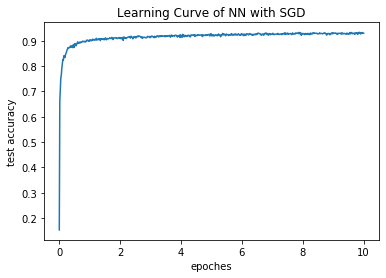

In [180]:
plt.plot(steps,test_acc)
plt.title("Learning Curve of NN with SGD")
plt.xlabel("epoches")
plt.ylabel("test accuracy")
plt.show()

We can be impressed that before the net 'saw' all the train examples it has already acheived high score, and from that point there were very little improvment.

###Q2

In [0]:
def get_random100_balanced(X_test,y_test):
  random_examples = pd.Series(pd.DataFrame(y_test).apply\
                              (lambda row: np.where(row==1)[0], axis=1)).apply\
                              (lambda idx: np.random.choice(idx,10)).values.flatten()

  idx = np.array([item for sublist in random_examples for item in sublist])
  return X_test[:,idx], y_test[:,idx]

In [0]:
q2_test_x, q2_test_y = get_random100_balanced(X_test,y_test)

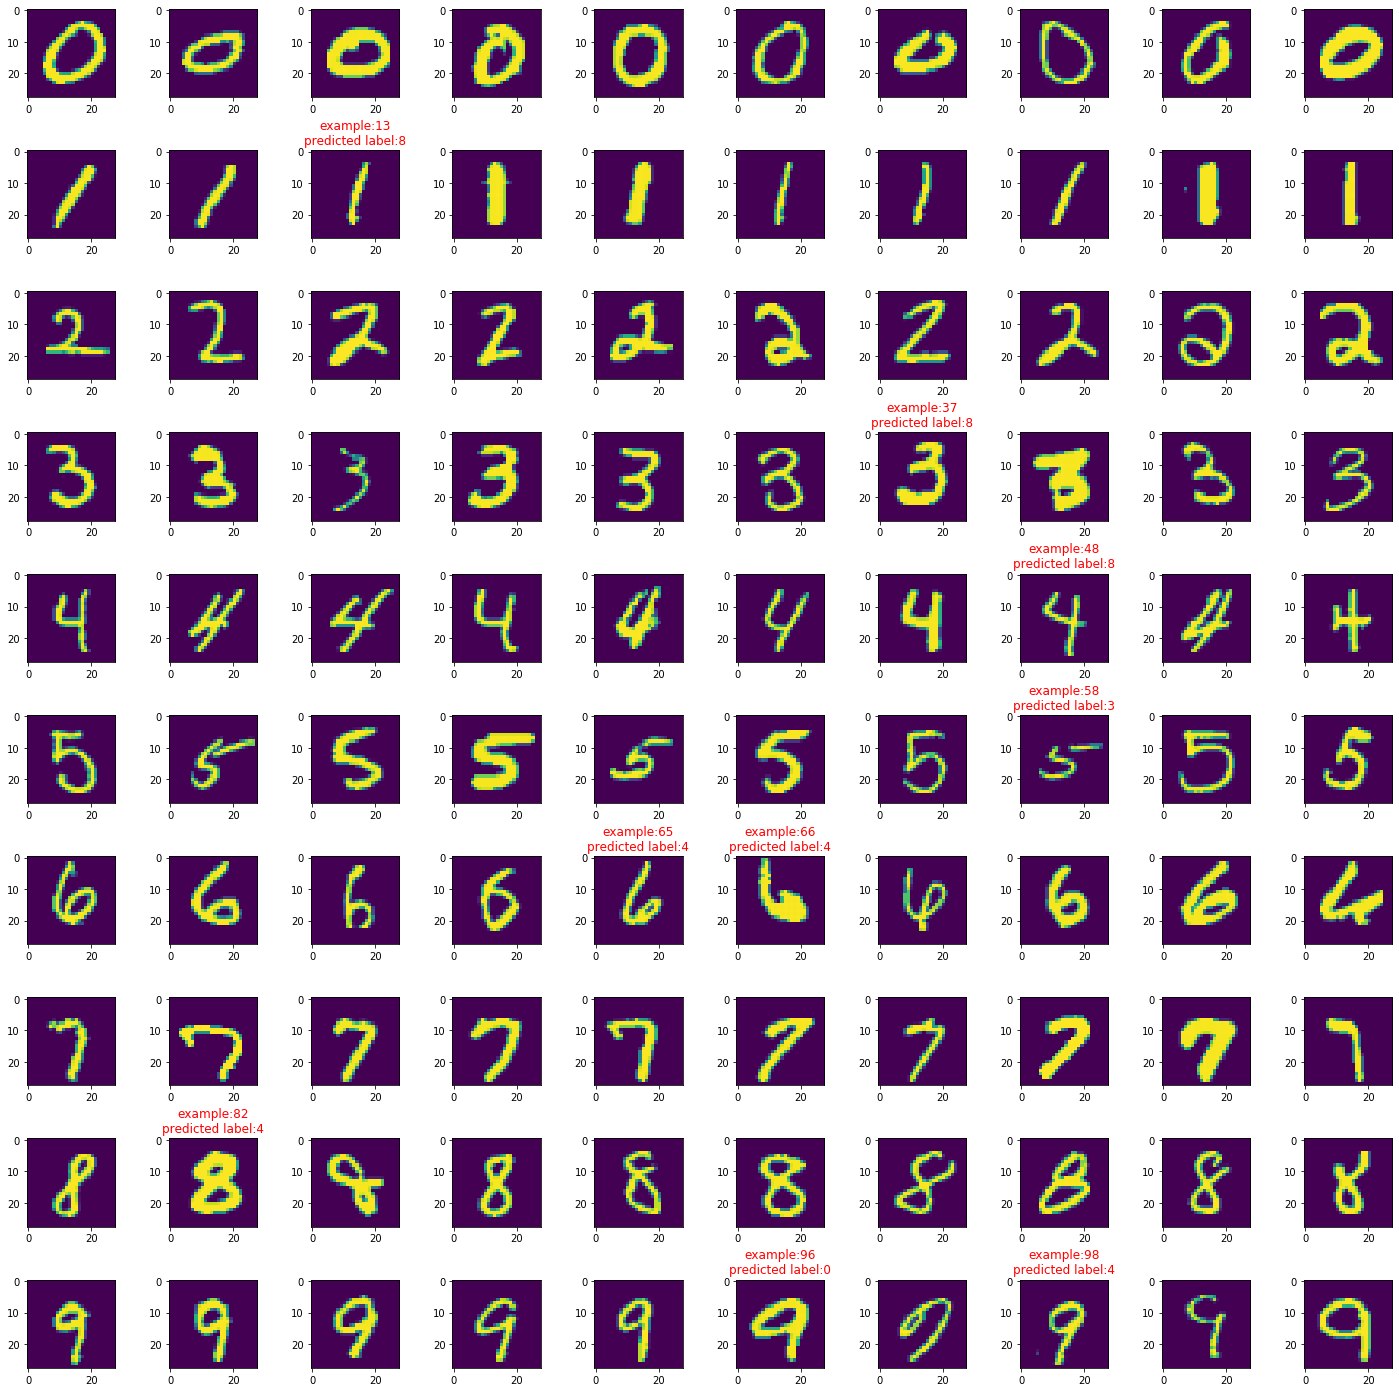

In [183]:
ypred = net.predict(q2_test_x)
s_ypred = pd.DataFrame(ypred).idxmax()
s_ytest = pd.DataFrame(q2_test_y).idxmax()
errors_labels = s_ypred[s_ypred!=s_ytest]

fig, ax = plt.subplots(nrows=10,ncols=10, figsize=(25,25))
plt.subplots_adjust(hspace=0.6)

counter=0
for i in range(10):
  for j in range(10):
    ax[i,j].imshow(X = q2_test_x[:,counter].reshape(28,28))
    counter+=1
    if counter in errors_labels.index:
      ax[i,j].set_title("example:"+str(counter)+"\npredicted label:"+str(s_ypred[counter]), c="r")

plt.savefig("Q2_plot.png")
plt.show()

We can see that substitution was done by the net between digits with relatively the same shape (maybe except 3 and 5). Also we can notice that the errors are digits which were written in unusual way (maybe except the last example of 9 and 4).

###Q3

In [0]:
# random permutation of the input
# uncomment this to use a fixed random permutation of the images

perm = np.random.permutation(784)
X_test = X_test[perm,:]
X_train = X_train[perm,:]

In [185]:
## Training
net = FF(layers_sizes)
steps, test_acc = net.sgd(X_train, y_train, epochs, eta, batch_size, X_test, y_test)

Starting training, test accuracy: 0.135
Done epoch 1, test accuracy: 0.905
Done epoch 2, test accuracy: 0.9113
Done epoch 3, test accuracy: 0.9246
Done epoch 4, test accuracy: 0.9266
Done epoch 5, test accuracy: 0.9259
Done epoch 6, test accuracy: 0.9292
Done epoch 7, test accuracy: 0.929
Done epoch 8, test accuracy: 0.9314
Done epoch 9, test accuracy: 0.9309
Done epoch 10, test accuracy: 0.9329


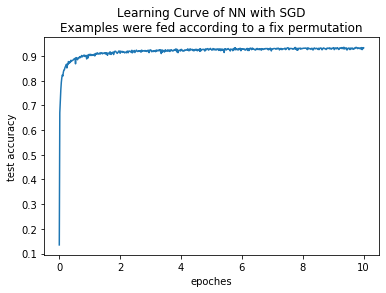

In [186]:
plt.plot(steps,test_acc)
plt.title("Learning Curve of NN with SGD\nExamples were fed according to a fix permutation")
plt.xlabel("epoches")
plt.ylabel("test accuracy")
plt.show()

In [0]:
q3_test_x, q3_test_y = get_random100_balanced(X_test,y_test)

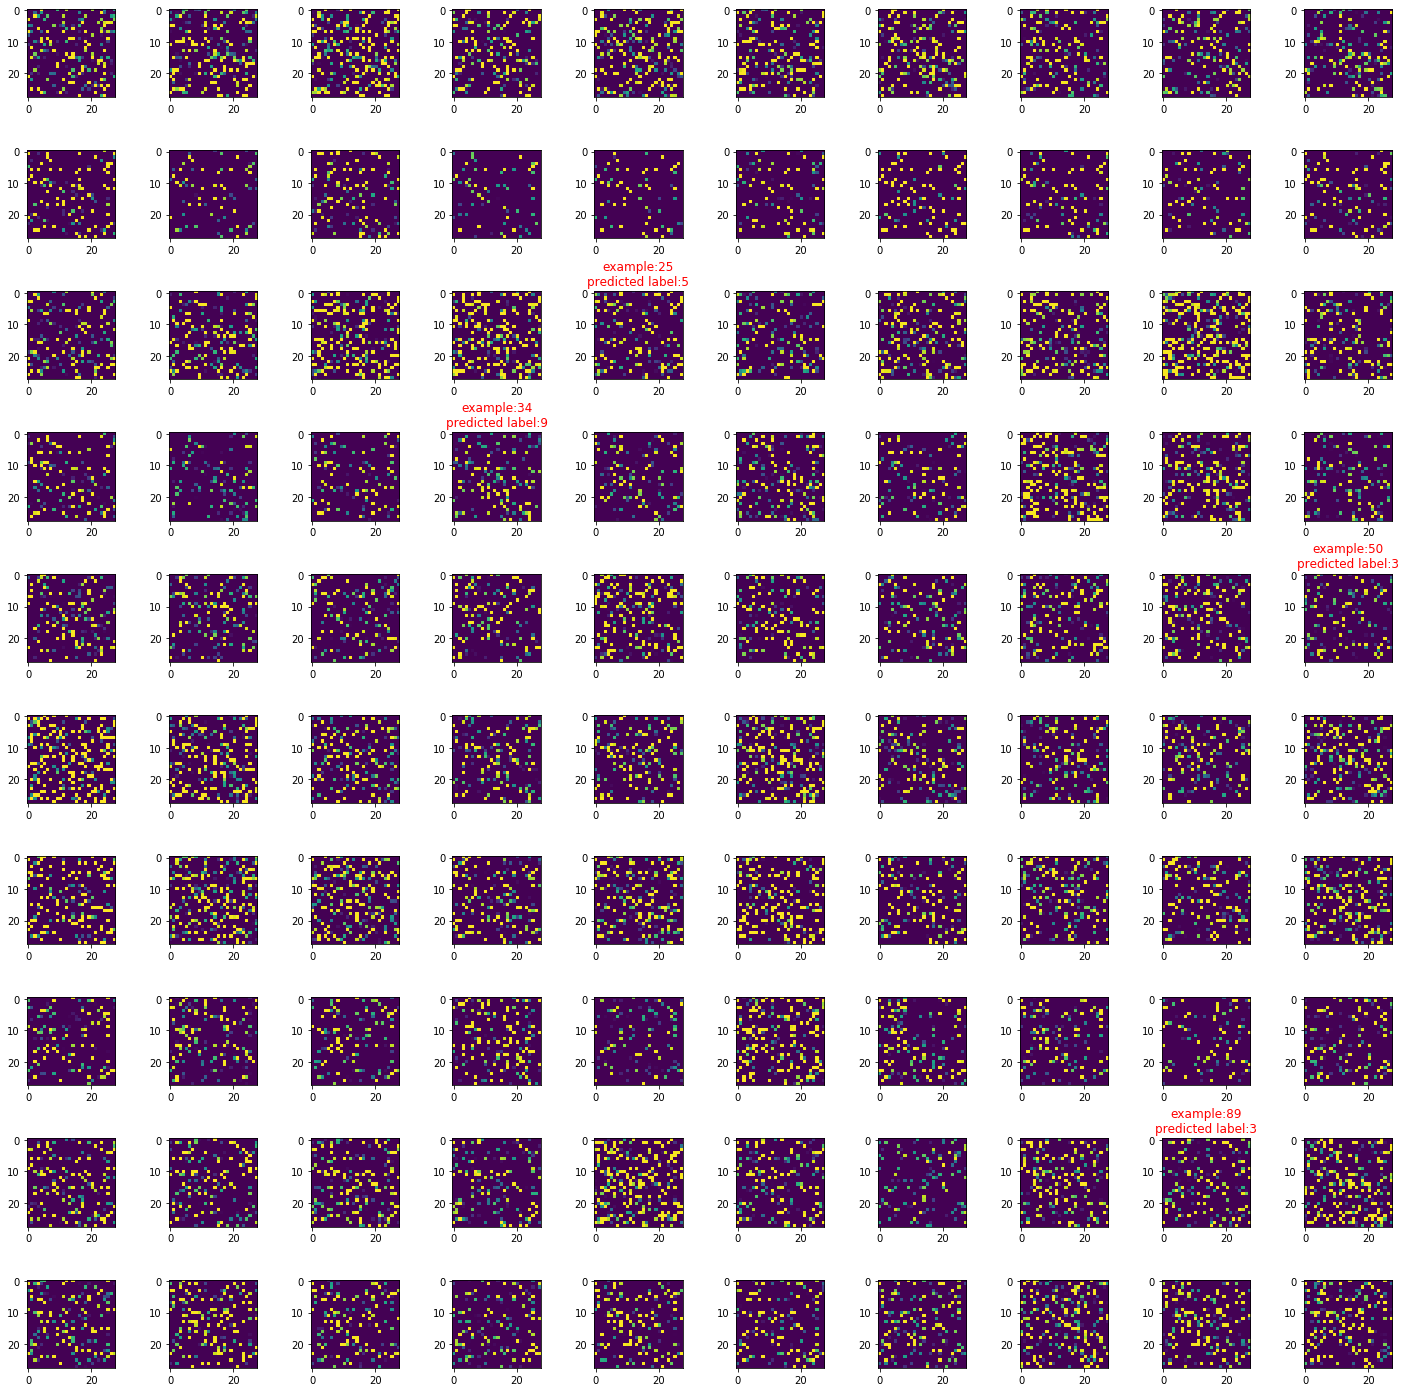

In [188]:
ypred = net.predict(q3_test_x)
s_ypred = pd.DataFrame(ypred).idxmax()
s_ytest = pd.DataFrame(q3_test_y).idxmax()
errors_labels = s_ypred[s_ypred!=s_ytest]

fig, ax = plt.subplots(nrows=10,ncols=10, figsize=(25,25))
plt.subplots_adjust(hspace=0.6)

counter=0
for i in range(10):
  for j in range(10):
    ax[i,j].imshow(X = q3_test_x[:,counter].reshape(28,28))
    counter+=1
    if counter in errors_labels.index:
      ax[i,j].set_title("example:"+str(counter)+"\npredicted label:"+str(s_ypred[counter]), c="r")

plt.savefig("Q3_plot.png")
plt.show()

From the Learning Curve and the number of errors we can be impressed that the although the images cannot be interpreted by humans, the examples's permutation didn't interrupt the net's preformance. The reason is that permutation kept its order both in the train and the test input. Therfore, the examples kept their similarity with respect to their corresponding true labels, as the net is based on mathematical operations only.

###Q4

We can guess that CNN will perform worse on such permuted input data. Since CNN layers are made to detect specific features in the whole image, they wouldn't be able to do this in the permuted one, as these specific features were mixed in the permutation. In other words, the images are 'randomly similar' each other, and the special property of the CNN will disturb its performance in such case.